In [1]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
import pandas as pd
# Activate automatic conversion between pandas and R data frames
pandas2ri.activate()

In [2]:
vegan = importr('vegan')

In [3]:
df = pd.read_excel("data/abundance.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 4432 entries, Articles to zone
dtypes: int64(4431), object(1)
memory usage: 2.8+ MB


In [4]:
df

,Articles,ability,able,aboriginal,abrupt,absence,absent,absolute,abstract,abstraction,...,yearly,yellow,yes,yield,yin,yond,young,youth,zeal,zone
0,a1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a3,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,a4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,a5,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,a79,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,a80,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
80,a81,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81,a82,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df.iloc[:,0].name

'Articles'

In [11]:
df = df.set_index('Articles')
df

,ability,able,aboriginal,abrupt,absence,absent,absolute,abstract,abstraction,abundance,...,yearly,yellow,yes,yield,yin,yond,young,youth,zeal,zone
Articles,,,,,,,,,,,,,,,,,,,,,
a1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a3,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
a4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
a5,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a79,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a80,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
a81,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
r_df = pandas2ri.py2rpy(df)

In [20]:
model = vegan.decorana(r_df,iweigh=0, ira=0)

In [25]:
print(type(model))

<class 'rpy2.robjects.vectors.ListVector'>


In [26]:
print(model.names)

['evals' 'rproj' 'cproj' 'adotj' 'aidot' 'ira' 'iresc' 'short' 'mk'
 'totchi' 'evals.ortho' 'evals.decorana' 'origin' 'v' 'fraction' 'iweigh'
 'before' 'after' 'call']


In [69]:
model.rx2('cproj')

array([[ 0.81776906,  0.83028212,  0.82166495,  0.39295506],
       [ 0.45059051,  0.67008928,  0.92920548,  0.58647953],
       [ 0.60167197,  0.84637755,  1.39873808,  0.96314059],
       ...,
       [ 1.36540267, -0.01759363,  2.3760002 ,  2.25631699],
       [-0.91161277, -0.48071346,  2.64839936,  2.51043931],
       [ 0.37920071,  1.23989597, -0.69020491,  0.22523762]],
      shape=(4431, 4))

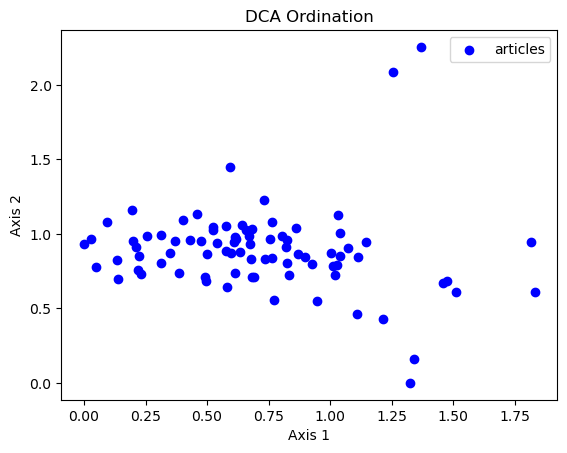

In [55]:
import matplotlib.pyplot as plt

# Extract site scores
site_scores = pd.DataFrame(model.rx2('rproj'))

# Extract species scores
species_scores = pd.DataFrame(model.rx2('cproj'))

# Plot site scores (first two axes)
plt.scatter(site_scores[0], site_scores[1], label='articles', color='blue')
#plt.scatter(species_scores[0], species_scores[1], label='worlds', color='red')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.legend()
plt.title('DCA Ordination')
plt.show()

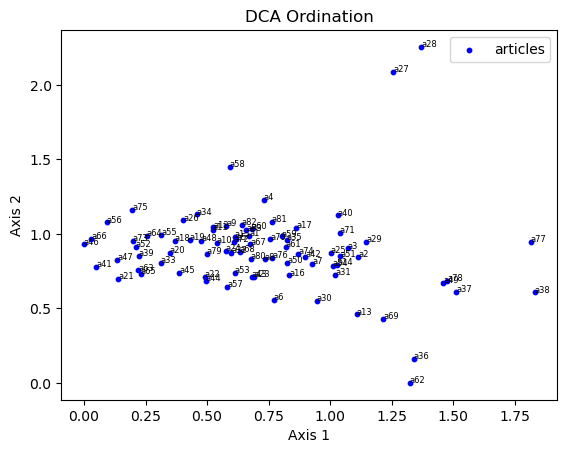

In [77]:
import matplotlib.pyplot as plt

# Plot site scores (first two axes)
plt.scatter(site_scores[0], site_scores[1], label='articles', color='blue', s=10)

# Add site names as text labels
for i, article in enumerate(df.index):
    plt.text(site_scores.iloc[i, 0], site_scores.iloc[i, 1], article, fontsize=6)

# Configure plot appearance
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.legend()
plt.title('DCA Ordination')
plt.show()

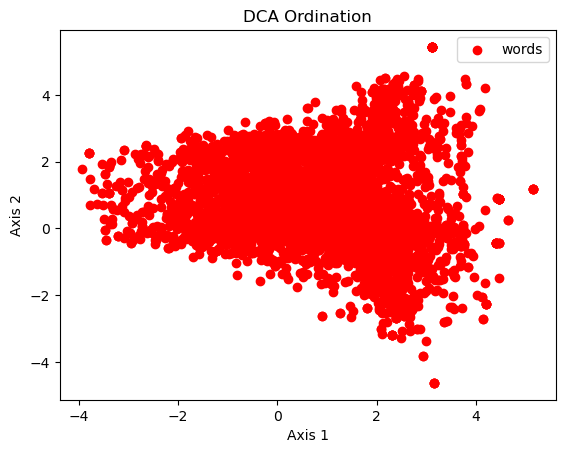

In [61]:
# Extract site scores
site_scores = pd.DataFrame(model.rx2('rproj'))

# Extract species scores
species_scores = pd.DataFrame(model.rx2('cproj'))

# Plot site scores (first two axes)
#plt.scatter(site_scores[0], site_scores[1], label='articles', color='blue')
plt.scatter(species_scores[0], species_scores[1], label='words', color='red')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.legend()
plt.title('DCA Ordination')
plt.show()

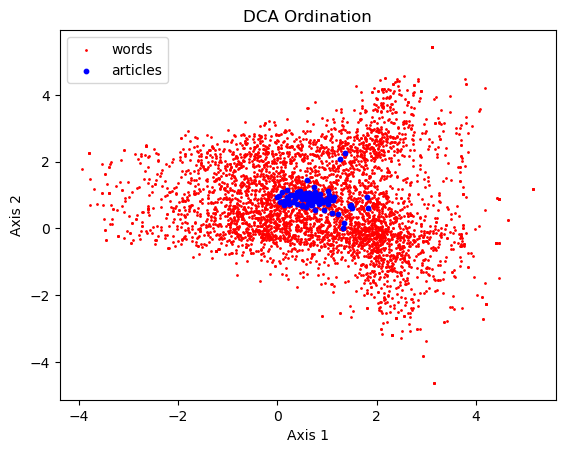

In [66]:
# Extract site scores
site_scores = pd.DataFrame(model.rx2('rproj'))

# Extract species scores
species_scores = pd.DataFrame(model.rx2('cproj'))

# Plot site scores (first two axes)
plt.scatter(species_scores[0], species_scores[1], label='words', color='red', s=1)
plt.scatter(site_scores[0], site_scores[1], label='articles', color='blue', s=10)
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.legend()
plt.title('DCA Ordination')
plt.show()

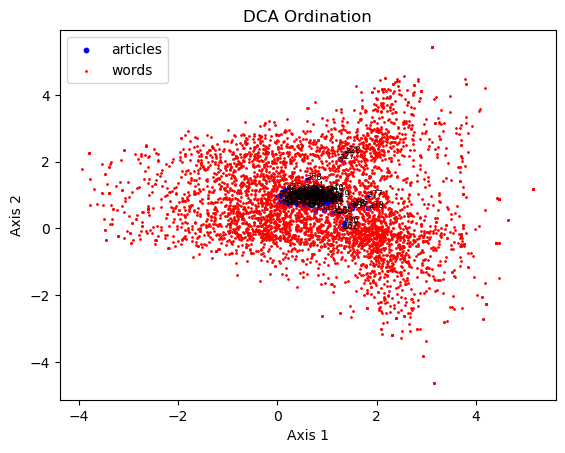

In [78]:
import matplotlib.pyplot as plt

# Plot site scores (first two axes)
plt.scatter(site_scores[0], site_scores[1], label='articles', color='blue', s=10)

# Add site names as text labels
for i, article in enumerate(df.index):
    plt.text(site_scores.iloc[i, 0], site_scores.iloc[i, 1], article, fontsize=6)

plt.scatter(species_scores[0], species_scores[1], label='words', color='red', s=1)
# Configure plot appearance
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.legend()
plt.title('DCA Ordination')
plt.show()